In [106]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [107]:
# Reading in the Application and Credit Records csv
url_application = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/application_cleaned.csv"
url_credit = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned.csv"

application_df = pd.read_csv(url_application)
credit_df = pd.read_csv(url_credit)

In [108]:
# Only the Label column is needed, ID is used as the key when merging the datasets
credit_df = credit_df[['ID', 'Label']]

In [109]:
# Merging application and credit csv based on ID
df = pd.merge(application_df, credit_df, how="inner", on="ID").loc[:,'ID':]

In [110]:
# Looking at the types of features
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
Label                    int64
dtype: object

In [111]:
# Separating the data into X and y
X = df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y = df["Label"]

In [113]:
# Identifying the columns that are of type int64 and float64
numeric_col = []
for names in X.columns:
  if X[names].dtypes in ['int64', 'float64']:
    numeric_col.append(names)

# Standardising the columns of type int64 and float64
features = X[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[numeric_col] = features

In [117]:
# Identifying the columns that are of type object
categorical_col = []
for names in X.columns:
  if X[names].dtypes in ['object']:
    categorical_col.append(names)

## One Hot Encoding the categorical columns
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(X[categorical_col])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([X, encoded_df], axis=1)

# Drop the original categorical columns if needed
df = df.drop(categorical_col, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Pensioners,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,-0.579661,2.365845,0.945169,-0.814156,1.853127,-0.646578,-0.313952,-0.217680,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.579661,2.365845,0.945169,-0.814156,1.853127,-0.646578,-0.313952,-0.217680,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.579661,-0.728827,-1.309091,0.114623,-0.539628,-0.646578,-0.313952,-0.217680,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.579661,0.818509,-0.746300,-0.407815,-0.539628,1.546603,3.185203,-1.314564,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.579661,0.818509,-0.746300,-0.407815,-0.539628,1.546603,3.185203,-1.314564,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


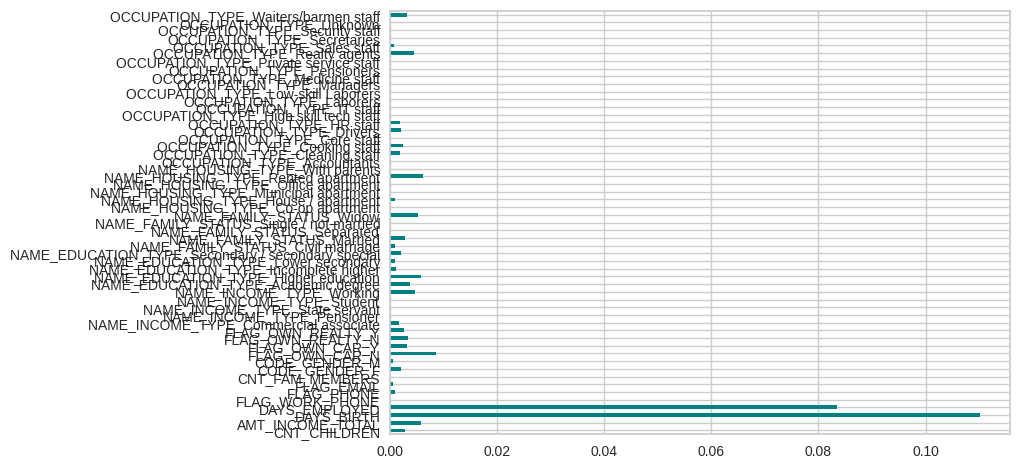

In [120]:
# Feature Selection by Filter method
# Information Gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(df, y)
feat_importances = pd.Series(importances, df.columns)
feat_importances.plot(kind='barh', color='teal')
plt.show()